# Welcome to an example Binder

We need `seaborn`, which shall be included it in `requirements.txt` file

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('NYPFellonies.csv')

In [4]:
df.head(5)

,PARK,SIZEacres,SIZEsqkm,CATEGORY,BOROUGH,LANDsqkm,POPULATION,MURDER,RAPE,ROBBERY,FELONYASSAULT,BURGLARY,GRANDLARCENY,GRANDLARCENYMV,TOTAL
0,PELHAM BAY PARK,2771.747,11.221648,ONE ACRE OR LARGER,BRONX,110.0,142654,0,0,2,2,0,3,0,7
1,VAN CORTLANDT PARK,1146.430,4.641417,ONE ACRE OR LARGER,BRONX,110.0,142654,0,1,1,2,0,4,0,8
2,ROCKAWAY BEACH AND BOARDWALK,1072.564,4.342364,ONE ACRE OR LARGER,QUEENS,280.0,2405464,0,0,1,2,1,3,0,7
3,FRESHKILLS PARK,913.320,3.697652,ONE ACRE OR LARGER,STATEN ISLAND,152.0,495747,0,0,0,0,0,0,0,0
4,FLUSHING MEADOWS CORONA PARK,897.690,3.634372,ONE ACRE OR LARGER,QUEENS,280.0,2405464,0,0,9,16,7,13,3,48


In [5]:
from sklearn import linear_model

#building Linear regression model (LRM)

lm = linear_model.LinearRegression()

#Head Size(cm^3) = (Brain Weight(grams))*b1 + b0

X = pd.DataFrame(df['SIZEsqkm'])
Y = pd.DataFrame(df['TOTAL'])

model_lm = lm.fit(X, Y)
model_lm

LinearRegression()

In [6]:
print('The intercept is \t :\t', model_lm.intercept_)
print('The coefficients are \t : \t', model_lm.coef_)
print('Model score (R-squared) is : \t', model_lm.score(X, Y))

The intercept is 	 :	 [0.81616105]
The coefficients are 	 : 	 [[2.20176562]]
Model score (R-squared) is : 	 0.05170235082501995


In [10]:
import statsmodels.api as sm
model = sm.OLS.from_formula('TOTAL ~ SIZEsqkm + POPULATION',
                            data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TOTAL   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     31.49
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           4.83e-14
Time:                        05:11:53   Log-Likelihood:                -3424.7
No. Observations:                1154   AIC:                             6855.
Df Residuals:                    1151   BIC:                             6871.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7029      0.279      2.518      0.012       0.155       1.251
SIZEsqkm       2.2118      0.279      7.935      0.000       1.665       2.759
POPULATION  6.423e-08   1.36e-07      0.471      0.638   -2.03e-07    3.32e-07
==============================================================================
Omnibus:                     2332.012   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6020053.529
Skew:                          15.558   Prob(JB):                         0.00
Kurtosis:                     355.466   Cond. No.                     4.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

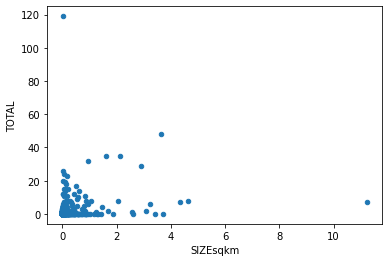

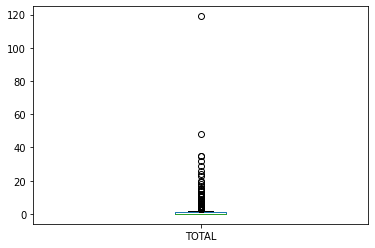

In [12]:
df.plot(kind='scatter', 
        x='SIZEsqkm', 
        y='TOTAL'
       )

df.plot(kind='box', y='TOTAL')

plt.show()